In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
train = pd.read_csv('titanic_train.csv', sep = ',')
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.shape

(891, 12)

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe(include = ['O']) #c'est un describe sur les colones de catégories donc sans les colones numériques

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Vanden Steen, Mr. Leo Peter",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
def filter_data_set(dataset,listArgs):
    train_target = dataset['Survived']
    train_x = dataset[listArgs]
    return train_x, train_target

In [8]:
train_0, target_0, = filter_data_set(train,['SibSp','Parch','Fare'])

In [9]:
train_0.head(4)

,SibSp,Parch,Fare
0,1,0,7.2500
1,1,0,71.2833
2,0,0,7.9250
3,1,0,53.1000


In [10]:
from sklearn.model_selection import cross_val_score

def compute_score(classifier,trainsetX,trainsetY):
    score_list = cross_val_score(classifier,trainsetX,trainsetY,cv = 5)
    return np.mean(score_list)

In [11]:
import random as rand

In [12]:
def random_892_lines():
    
    list_and_prediction = []
    for i in range(0,891):
        list_and_prediction.append(rand.randint(0,1))
    return list_and_prediction

def calc_error(list_pred,list_reality):
    
    np_pred = np.array(list_pred)
    np_reality = np.array(list_reality)
    
    good_pred = np.sum(np_pred == np_reality)
    accu = good_pred / len(list_pred)
    return accu

listpred = random_892_lines()
accu = calc_error(listpred,target_0)
print('Accuracy RANDOM :', accu)

Accuracy RANDOM : 0.5230078563411896


In [13]:
listpred = []
for i in range (0,891):
    listpred.append(0)
accu = calc_error(listpred,target_0)
print('ACCURACY ALL DEAD :', accu)

ACCURACY ALL DEAD : 0.6161616161616161


In [14]:
lr = LogisticRegression()
compute_score(lr,train_0,target_0)

0.6746092524009792

In [15]:
import seaborn as sns

Text(0.5, 1.0, 'Count of survival')

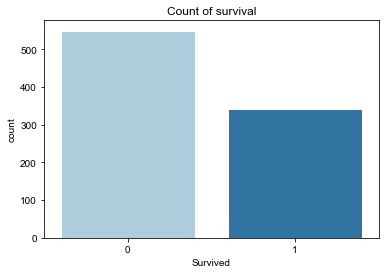

In [16]:
fig, ax = plt.subplots(figsize=(6,4))
sns.set_style('darkgrid')
sns.color_palette('deep',2)
sns.countplot(x = 'Survived', data = train, palette = sns.color_palette('Paired',3))
plt.title('Count of survival')

Text(0.5, 1.0, 'Impact of Pclass on survival')

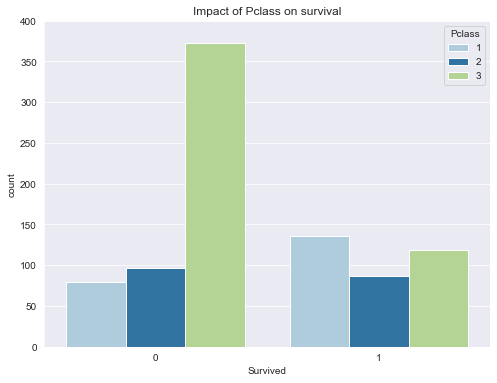

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(x = 'Survived', data = train, hue = 'Pclass', palette = sns.color_palette('Paired',10))
ax.set_ylim(0,400)
plt.title('Impact of Pclass on survival')

Text(0.5, 1.0, 'Impact of sex on survival')

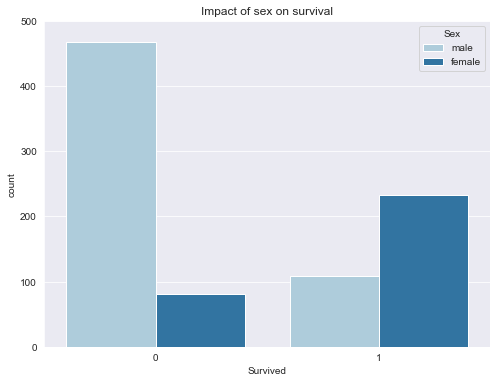

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(x = 'Survived', data = train, hue = 'Sex', palette = sns.color_palette('Paired',10))
ax.set_ylim(0,500)
plt.title('Impact of sex on survival')

In [19]:
train_1 = train_0.join(pd.get_dummies(train['Pclass'],prefix = 'SplitPclass_'))
train_1.head()

,SibSp,Parch,Fare,SplitPclass__1,SplitPclass__2,SplitPclass__3
0,1,0,7.2500,0,0,1
1,1,0,71.2833,1,0,0
2,0,0,7.9250,0,0,1
3,1,0,53.1000,1,0,0
4,0,0,8.0500,0,0,1


In [20]:
lr = LogisticRegression()
compute_score(lr,train_1,target_0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6937040989266211

In [21]:
train['Age'] = train.Age.fillna(train.Age.median())
train.Age.count()

891

In [22]:
train_2 = train_1.join(pd.get_dummies(train['Sex'], prefix = 'Split_Sex_'))
train_2.head(4)
train_2 = train_2.join(train['Age'])
train_2.head(4)

,SibSp,Parch,Fare,SplitPclass__1,SplitPclass__2,SplitPclass__3,Split_Sex__female,Split_Sex__male,Age
0,1,0,7.2500,0,0,1,0,1,22.0
1,1,0,71.2833,1,0,0,1,0,38.0
2,0,0,7.9250,0,0,1,1,0,26.0
3,1,0,53.1000,1,0,0,1,0,35.0


In [23]:
lr = LogisticRegression()
compute_score(lr,train_2,target_0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7867553825874083

In [24]:
train_3 = train_2.copy()
train_3['IsChild'] = train_3.Age < 8

In [25]:
lr = LogisticRegression()
compute_score(lr,train_3,target_0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7968489109283786

In [26]:
lr = LogisticRegression()
lr.fit(train_3,target_0)
array_coeff = lr.coef_
df_coeff = pd.DataFrame(array_coeff,columns = train_3.columns)
df_coeff

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,SibSp,Parch,Fare,SplitPclass__1,SplitPclass__2,SplitPclass__3,Split_Sex__female,Split_Sex__male,Age,IsChild
0,-0.420614,-0.181697,0.004067,1.058577,0.144803,-0.850764,1.541186,-1.18857,-0.022547,1.715312


In [27]:
train_2.head()

,SibSp,Parch,Fare,SplitPclass__1,SplitPclass__2,SplitPclass__3,Split_Sex__female,Split_Sex__male,Age
0,1,0,7.2500,0,0,1,0,1,22.0
1,1,0,71.2833,1,0,0,1,0,38.0
2,0,0,7.9250,0,0,1,1,0,26.0
3,1,0,53.1000,1,0,0,1,0,35.0
4,0,0,8.0500,0,0,1,0,1,35.0


In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
compute_score(rf,train_2,target_0)

0.814864101437449

In [29]:
leonardoDicaprio = [[0,0,8.0,0,0,1,0,1,25.0]]
classifier = rf.fit(train_2,target_0)
result = rf.predict(leonardoDicaprio)
print('Leonardo will survive ?', result)
predictions = classifier.predict_proba(leonardoDicaprio)
print('confidence/probability for [Not surviving / surviving]', predictions)

Leonardo will survive ? [0]
confidence/probability for [Not surviving / surviving] [[1. 0.]]
